In [1]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

Text(0.5, 1.0, 'Training Data with Class Labels')

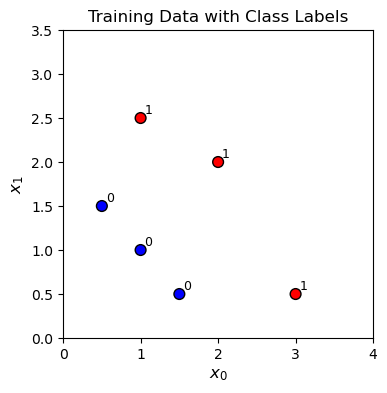

In [3]:
def plot_data(x, y, ax):
    colors = ['blue' if label == 0 else 'red' for label in y]
    ax.scatter(x[:, 0], x[:, 1], c=colors, edgecolors='k', s=60)
    for (xi, yi), label in zip(x, y):
        ax.text(xi + 0.05, yi + 0.05, str(label), fontsize=9)

fig, ax = plt.subplots(figsize=(4, 4))
plot_data(x_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_title('Training Data with Class Labels')


## Derive the Gradient of Logistic Regression Loss Function
### 1.Model Definition
Giving a training set of $m$ examples:
+ $x^{(i)} \in R^n$ : input feature vector for examples i
+ $y^{(i)} \in {[0, 1]}$ : true label 
+ $w \in R^n$ : wieghts
+ $b \in R$ : bias

Logistic model:  
$$z^{(i)} = w^T \cdot x^{(i)} + b$$
$$\widehat{y}^{(i)} = \sigma(z^{(i)})= \frac{1}{1 + e^{-z^{(i)}}}$$
### 2.Loss function
Binary cross-entropy loss:
$$L^{(i)} = -[y^{(i)}\log(\widehat{y}^{(i)}) + (1 - y^{(i)})\log(1 - \widehat{y}^{(i)})]$$
Total cost function:
$$J(w, b) = \frac{1}{m}\sum_{i = 1}^m = -\frac{1}{m}\sum_{i = 1}^m[y^{(i)}\log(\widehat{y}^{(i)}) + (1 - y^{(i)})\log(1 - \widehat{y}^{(i)})]$$
### 3.Compute the Gradients
#### 3.1 Derivative for $w_j$
$$
\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i = 1}^m \frac{\partial L^{(i)}}{\partial w_j}
$$
Apply the Chain Rule:
$$
\frac{\partial J}{\partial w_j} = \frac{\partial L^{(i)}}{\partial \widehat{y}^{(i)}} \cdot \frac{\partial \widehat{y}^{(i)}}{\partial z^{(i)}} \cdot \frac{\partial z^{(i)}}{\partial w_j}
$$

#### Compute for each component:
First part $\frac{\partial L^{(i)}}{\partial \widehat{y}^{(i)}}$
$$
L^{(i)} = -[y^{(i)}\log(\widehat{y}^{(i)}) + (1 - y^{(i)})\log(1 - \widehat{y}^{(i)})]
$$
$$
\frac{\partial L^{(i)}}{\partial \widehat{y}^{(i)}} = -\frac{y}{\widehat{y}^{(i)}} + \frac{1 - y^{(i)}}{1 - \widehat{y}^{(i)}}
$$

Second part $\frac{\partial \widehat{y}^{(i)}}{\partial z^{(i)}}$
$$
\frac{\partial \widehat{y}^{(i)}}{\partial z^{(i)}}(\frac{1}{1 + e^{-z^{(i)}}})
$$
$$
\frac{\partial \widehat{y}^{(i)}}{\partial z^{(i)}}(1 + e^{-z^{(i)}})^{-1} = -(1 + e^{-z^{(i)}})^{-2}\cdot (1 + e^{-z^{(i)}})'
$$
$$
\frac{\partial \widehat{y}^{(i)}}{\partial z^{(i)}}(1 + e^{-z^{(i)}})^{-1} = -(1 + e^{-z^{(i)}})^{-2}\cdot (-e^{-z^{(i)}})
$$
$$
\frac{\partial \widehat{y}^{(i)}}{\partial z^{(i)}}(1 + e^{-z^{(i)}})^{-1} = \frac{e^{-z^{(i)}}}{(1 + e^{-z^{(i)}})^{2}}
$$
$$\Rightarrow \frac{\partial \widehat{y}^{(i)}}{\partial z^{(i)}} = \frac{e^{-z^{(i)}}}{(1 + e^{-z^{(i)}})^{2}} = \sigma(z)(1 - \sigma(z))
$$

Third part $\frac{\partial z^{(i)}}{\partial w_j}$
$$
\frac{\partial z^{(i)}}{\partial w_j}(\sum_k w_k x_k^{(i)} + b) = x_j^{(i)}
$$
#### Combine the Chain Rule:
$$
\frac{\partial J}{\partial w_j} = (-\frac{y}{\widehat{y}^{(i)}} + \frac{1 - y^{(i)}}{1 - \widehat{y}^{(i)}}) \cdot \sigma(z)(1 - \sigma(z)) \cdot x_j^{(i)}
$$
$$
\frac{\partial J}{\partial w_j} = (-\frac{y}{\widehat{y}^{(i)}} + \frac{1 - y^{(i)}}{1 - \widehat{y}^{(i)}}) \cdot\widehat{y}^{(i)}(1 - \widehat{y}^{(i)}) \cdot x_j^{(i)}
$$
so:
$$
\frac{\partial J}{\partial w_j} = (\widehat{y}^{(i)} - y^{(i)})\cdot x_j^{(i)}
$$

## Gradient descent for logistic regression
+ Recall the gradient descent algorithm utilizes the gradient calculation:
$$
w_j = w_j - \alpha \frac{\partial J(w, b)}{\partial w_j} \quad \forall j \in [0...n-1]
$$
$$
b = b - \alpha \frac{\partial J(w, b)}{\partial b}
$$
+ Where each iteraction performs simultaneous updates on $w_j$ for all $j$
$$
\frac{\partial J(w, b)}{\partial w_j} = \frac{1}{m} \sum_{i = 0}^{m-1}(f_{w, b}(x^{(i)}) - y^{(i)})x_j^{(i)}
$$
$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i = 0}^{m-1}(f_{w, b}(x^{(i)}) - y^{(i)})
$$
  + m is the number of training examples in the data set br
  + $f_{w, b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
  + For a logistic regression model 
    + $z = w \cdot x + b$
    + $f_{w, b}(x) = g(z)$
    + where g(z) is sigmoid function: $g(z) = \frac{1}{1 + e^{-z}}$
